# Teleportation - Cirq
I will use the Google cirq framework to implement the teleportation protocol.

In [106]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Teleportation
In order to verify that measurements statistics are accurately simulated, I will use a rangle of initial states range of initial states $\cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle$ and report the simulator observed probabilities in the computational basis on the qubit with the teleported state. It will be compared to the theoretical prediction from the initial state.

A agreement between the measurement probabilities and the probabilities from the initial state imply that the state was successfully teleported.

In [124]:
def teleport(angle,repetitions=1024):
    '''
        Creates a quantum circuit to teleport a state cos(\theta/2)|0> + sin(\theta/2)|1>
        The measurements statistics for repetitions number of trials are returned on the final qubit after teleportation.
    '''
    # define a three qubit circuit
    q0, q1, q2 = [cirq.LineQubit(i) for i in range(3)]
    circuit = cirq.Circuit()
    
    # RotYGate is used to prepare the initial state
    RotY = cirq.RotYGate(rads=angle)
    RotY.on([q0])
    circuit.append([RotY(q0)])
    
    # create the Bell state between q1 and q2
    circuit.append([cirq.H(q1)])
    circuit.append([cirq.CNOT(q1,q2)])
    
    # measure q0,q1 in Bell basis
    circuit.append([cirq.CNOT(q0,q1)])
    circuit.append([cirq.H(q0)])
    
    # correction to the q3 state after teleportation
    circuit.append([cirq.CNOT(q1,q2)])
    circuit.append([cirq.CZ(q0,q2)])
   
    # measurement
    circuit.append([cirq.measure(q0),cirq.measure(q1),cirq.measure(q2)])

    simulator = cirq.google.XmonSimulator()
    result = simulator.run(circuit,qubit_order=[q0, q1,q2],repetitions=repetitions)

    # hacky way to find the prob, the measurements are True | False
    prob_0 = 1 - np.sum(result.measurements[str(q2)])/repetitions
    prob_1 = np.sum(result.measurements[str(q2)])/repetitions
    return prob_0,prob_1,circuit

## Test on a single state

In [125]:
angle = np.pi/4
exp_prob_0 = (np.cos(angle/2))**2
exp_prob_1 = (np.sin(angle/2))**2
prob_0,prob_1,circuit = teleport(angle)
print("Circuit Diagram")
print(circuit)
print("Measured prob.",[prob_0,prob_1])
print("Expected prob.",[exp_prob_0,exp_prob_1])

Circuit Diagram
0: ───Y^0.25───────────@───H───────@───M───
                       │           │
1: ────────────H───@───X───────@───┼───M───
                   │           │   │
2: ────────────────X───────────X───@───M───
Measured prob. [0.8681640625, 0.1318359375]
Expected prob. [0.8535533905932737, 0.14644660940672624]


## Test on a range of states

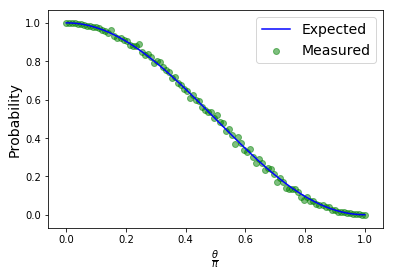

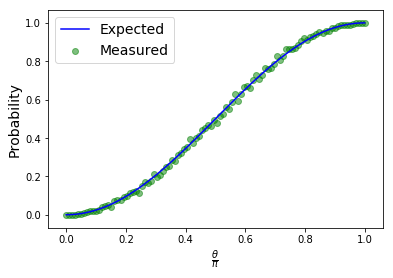

In [126]:
# test over a range of angles
angle_vec = np.linspace(0,np.pi,100)
exp_prob_0 = np.cos(angle_vec/2)**2
exp_prob_1 = np.sin(angle_vec/2)**2
prob_0_vec = [] 
prob_1_vec = [] 
for angle in angle_vec:
    prob = teleport(angle)
    prob_0_vec.append(prob[0])
    prob_1_vec.append(prob[1])

plt.figure(1)
plt.plot(angle_vec/np.pi,exp_prob_0,label="Expected",color="b")
plt.scatter(angle_vec/np.pi,prob_0_vec,label="Measured",color="g",alpha=0.5)
plt.xlabel(r"$\frac{\theta}{\pi}$",fontsize=14)
plt.ylabel(r"Probability",fontsize=14)
plt.legend(fontsize=14)

plt.figure(2)
plt.plot(angle_vec/np.pi,exp_prob_1,label="Expected",color="b")
plt.scatter(angle_vec/np.pi,prob_1_vec,label="Measured",color="g",alpha=0.5)
plt.xlabel(r"$\frac{\theta}{\pi}$",fontsize=14)
plt.ylabel(r"Probability",fontsize=14)
plt.legend(fontsize=14)

# Notes 
- The RotYGate has non-trivial initialization syntax. I had to look at the source to understand how to make it work.